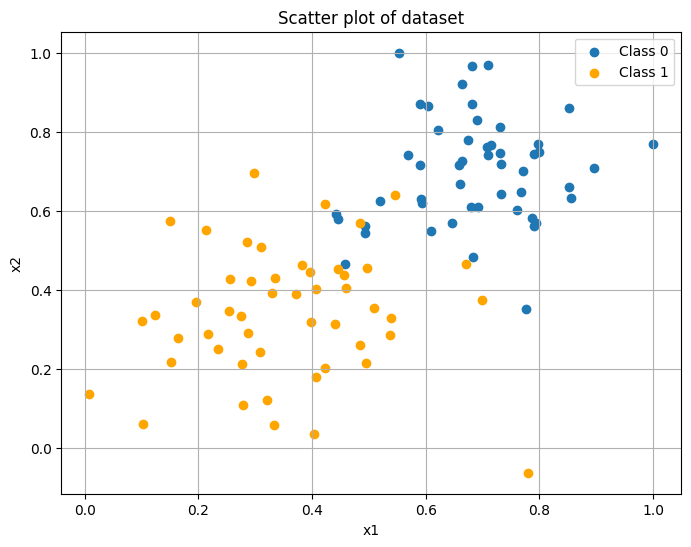

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv", header=None)
df.columns = ["x1", "x2", "y"]
X = df[["x1", "x2"]].values
y = df["y"].values

plt.figure(figsize=(8, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='tab:blue', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='orange', label='Class 1')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of dataset")
plt.legend()
plt.grid(True)
plt.show()


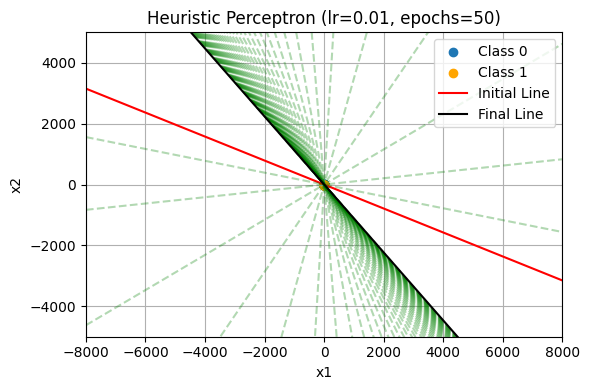

Training with learning rate: 0.01
Iterations to converge: 50
Final weights: [-2.17297082 -1.94522975]
Final bias: 1.8630456324635594
Accuracy: 93.00%



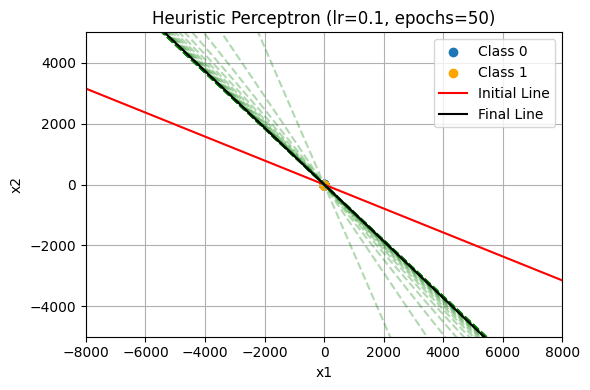

Training with learning rate: 0.1
Iterations to converge: 50
Final weights: [-7.18306184 -7.70666596]
Final bias: 7.2470943416691505
Accuracy: 93.00%



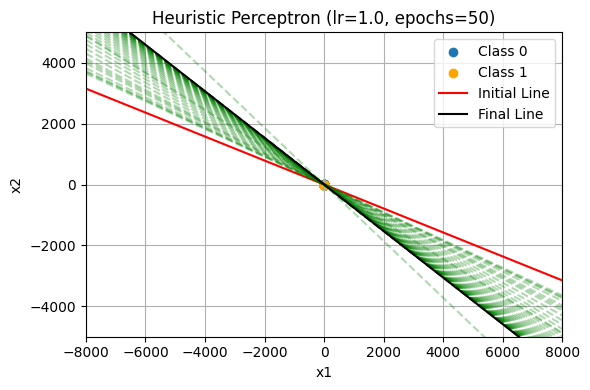

Training with learning rate: 1.0
Iterations to converge: 50
Final weights: [-13.63492232 -17.82248411]
Final bias: 13.914486261894538
Accuracy: 91.00%



In [17]:
def heuristic_with_output(X, y, lr=1.0, epochs=50):
    np.random.seed(42)
    w = np.random.rand(2)
    b = np.random.rand(1)[0]

    plt.figure(figsize=(6, 4))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='tab:blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='Class 1')

    x_vals = np.linspace(-8000, 8000, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'r-', label='Initial Line')

    for epoch in range(epochs):
        for xi, yi in zip(X, y):
            z = np.dot(w, xi) + b
            y_hat = sigmoid(z)
            error = yi - y_hat
            b += lr * error
            w += lr * error * xi

        if epoch < epochs - 1:
            y_vals = -(w[0] * x_vals + b) / w[1]
            plt.plot(x_vals, y_vals, 'g--', alpha=0.3)

    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k-', label='Final Line')

    plt.title(f"Heuristic Perceptron (lr={lr}, epochs={epochs})")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-8000, 8000)
    plt.ylim(-5000, 5000)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    z_all = np.dot(X, w) + b
    predictions = (sigmoid(z_all) >= 0.5).astype(int)
    accuracy = (predictions == y).mean() * 100

    print(f"Training with learning rate: {lr}")
    print(f"Iterations to converge: {epochs}")
    print(f"Final weights: {w}")
    print(f"Final bias: {b}")
    print(f"Accuracy: {accuracy:.2f}%\n")

# With multiple learning rates
for learning_rate in [0.01, 0.1, 1.0]:
    heuristic_with_output(X, y, lr=learning_rate, epochs=50)

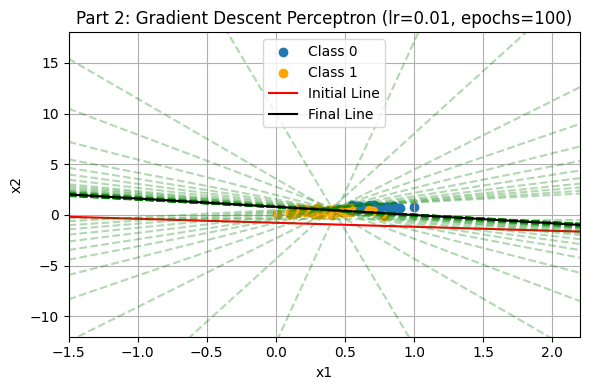

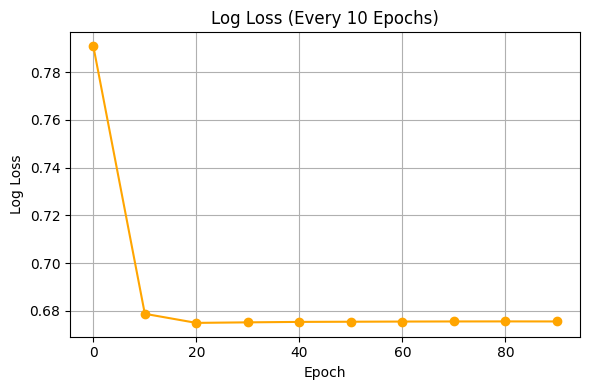

Training with learning rate: 0.01
Iterations to converge: 100
Final weights: [-0.09272239 -0.11407515]
Final bias: 0.09199394181140458
Accuracy: 91.00%



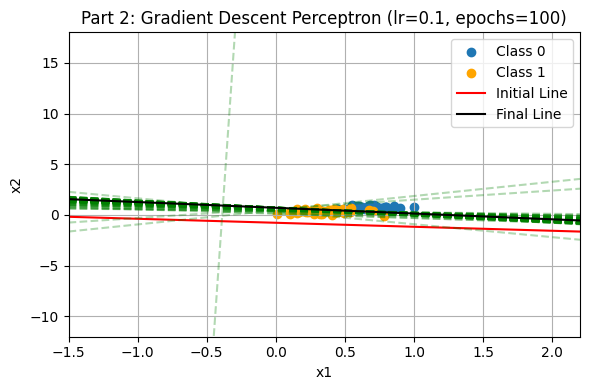

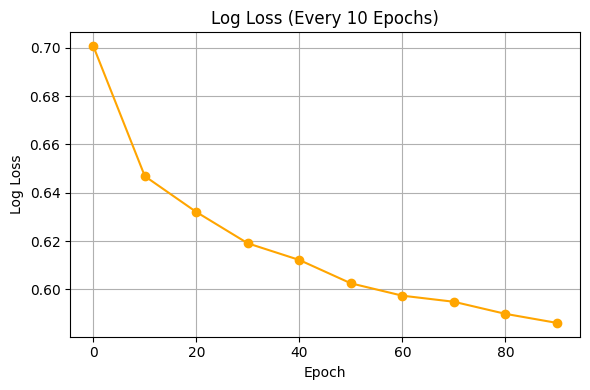

Training with learning rate: 0.1
Iterations to converge: 100
Final weights: [-0.50753188 -0.89464919]
Final bias: 0.6319939418114051
Accuracy: 93.00%



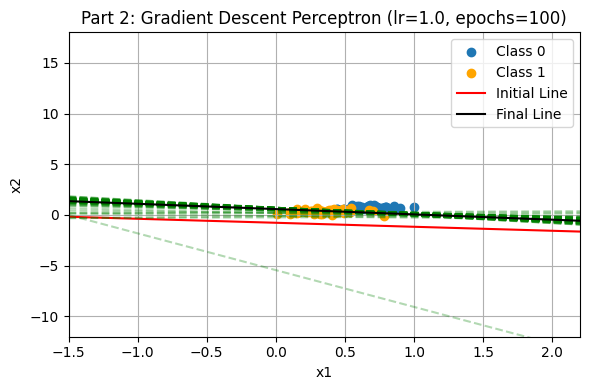

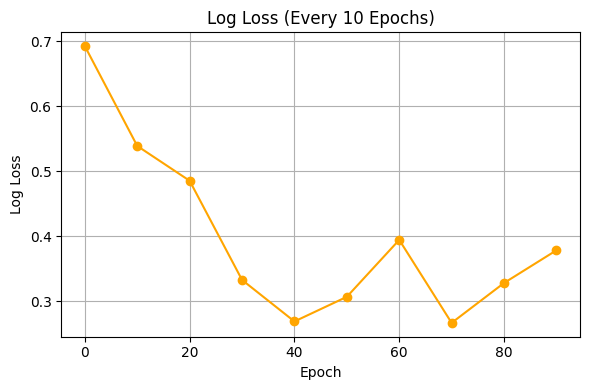

Training with learning rate: 1.0
Iterations to converge: 100
Final weights: [-5.16954988 -9.89549269]
Final bias: 5.731993941811405
Accuracy: 79.00%



In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log loss function
def log_loss(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_descent(X, y, lr=0.1, epochs=100):
    np.random.seed(42)
    w = np.random.rand(2)
    b = np.random.rand(1)[0]
    log_losses = []

    plt.figure(figsize=(6, 4))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='tab:blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='Class 1')
    x_vals = np.linspace(-1.5, 2.2, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'r-', label='Initial Line')

    for epoch in range(epochs):
        for xi, yi in zip(X, y):
            z = np.dot(w, xi) + b
            y_hat = sigmoid(z)
            pred_class = 1 if y_hat >= 0.5 else 0

            if pred_class != yi:
                if pred_class == 0:
                    b += lr
                    w += lr * xi
                else:
                    b -= lr
                    w -= lr * xi

        if epoch < epochs - 1:
            y_vals = -(w[0] * x_vals + b) / w[1]
            plt.plot(x_vals, y_vals, 'g--', alpha=0.3)

        if epoch % 10 == 0:
            preds = sigmoid(np.dot(X, w) + b)
            loss = log_loss(y, preds)
            log_losses.append((epoch, loss))

    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k-', label='Final Line')

    plt.title(f" Gradient Descent Perceptron (lr={lr}, epochs={epochs})")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-1.5, 2.2)
    plt.ylim(-12, 18)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    epochs_, losses = zip(*log_losses)
    plt.plot(epochs_, losses, marker='o', color='orange')
    plt.xlabel("Epoch")
    plt.ylabel("Log Loss")
    plt.title("Log Loss (Every 10 Epochs)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    predictions = (sigmoid(np.dot(X, w) + b) >= 0.5).astype(int)
    accuracy = np.mean(predictions == y) * 100

    print(f"Training with learning rate: {lr}")
    print(f"Iterations to converge: {epochs}")
    print(f"Final weights: {w}")
    print(f"Final bias: {b}")
    print(f"Accuracy: {accuracy:.2f}%\n")

for lr in [0.01, 0.1, 1.0]:
    part2_gradient_descent(X, y, lr=lr, epochs=100)
